In [2]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
import run_all_exp
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

from emulator_utils import brewer2_light

%load_ext autoreload
%autoreload 2

In [14]:
def plot_box(experiments, scenarios, T_out, regions, save=False, fig_name=None):
  n_exp, n_scen, n_boxes = len(experiments), len(scenarios), len(regions)
  fig, ax = plt.subplots(n_exp, n_scen, figsize=(4*n_scen,4*n_exp), constrained_layout=True, sharex='col', sharey='row')

  for i, exp in enumerate(experiments):
    T_out_temp = T_out[exp]
    if i == 1:
      regions = ['Atmosphere','Ocean']

    for j, scen in enumerate(scenarios):
      T_true_temp = T_out_temp[scen].T
      n_boxes = T_true_temp.shape[1]
      for k in range(n_boxes):
        ax[i,j].plot(T_true_temp[:,k], lw=3, c=brewer2_light(k), label = regions[k])

      if j == 0:
        ax[i,j].legend(fontsize=20)
        ax[i,j].set_ylabel(r'Temperature [$^\circ$C]',fontsize=22)

      if i == n_exp - 1:
        ax[i,j].set_xlabel('Year',fontsize=24)

          # Add scenario names as row labels (test)
      if i == 0:
        if scen == 'Abrupt':
          title = r'\textit{Abrupt}'
        elif scen == 'High Emissions':
          title = r'\textit{High Emissions}'
        elif scen == 'Mid. Emissions':
          title = r'\textit{Mid. Emissions}'
        elif scen == 'Overshoot':
          title = r'\textit{Overshoot}'
        ax[i,j].set_title(title, fontsize=24, va="center")

      ax[i,j].tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

In [51]:
def plot_experiments(experiments, scenarios, T_out, regions, save=False, fig_name=None):
  n_exp, n_scen, n_boxes = len(experiments), len(scenarios), len(regions)
  fig, ax = plt.subplots(n_exp, n_scen, figsize=(5*n_scen,5*n_exp), constrained_layout=True, sharex='col', sharey='row')
  regions_in = regions

  for i, scen in enumerate(scenarios):
    for j, exp in enumerate(experiments):
      if j == 2:
        regions = ['Atmosphere','Ocean']
      else:
        regions = regions_in

      T_true_temp = T_out[exp][scen].T
      n_boxes = T_true_temp.shape[1]

      for k in range(n_boxes):
        ax[i,j].plot(T_true_temp[:,k], lw=3, c=brewer2_light(k), label = regions[k])

      if i == 0:
        ax[i,j].legend(fontsize=20, loc='lower right')

      if j == 0:
        ax[i,j].set_ylabel(r'Temperature [$^\circ$C]',fontsize=22)

      if i == n_exp - 1:
        ax[i,j].set_xlabel('Year',fontsize=24)

      # Add scenario names as row labels (test)
      if j == 1:
        #for j, test_name in enumerate(scenarios):
        if scen == '2xCO2':
          title = r'\textit{Abrupt}: $F(t) = F_{2\times}$'
        elif scen == 'High Emissions':
          title = r'\textit{High Emissions}: $F(t) = F_e \exp{(t/\tau_e)}$'
        elif scen == 'Overshoot':
          title = r'\textit{Overshoot}: $F(t) = F_o \exp{(-(t - t_o)^2/(2\sigma^2))}$'
        ax[i,j].set_title(title, fontsize=24, va="center", pad=20)

      ax[i,j].tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

### Run and plot all experiment

In [20]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 3

# Initialize forcing vectors and run scenarios
experiments = ['3box_coup','2box_coup']
scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']
regions = ['High Lat. Ocean','Land','Low Lat. Ocean']
full_outputs, T_out, forcings = {}, {}, {}
for i, exp in enumerate(experiments):
  T_out[exp], forcings[exp] = {}, {}

  #n_boxes = run_all_exp.get_num_boxes(i)
  if exp == '2box_coup':
    n_boxes = 2

  # Horizontally coupled vs. not
  if i == 0:
    diff_flag = 1
  else:
    diff_flag = 0

  # Vertically coupled vs not
  if i == 1:
    vert_diff_flag = 1
  else:
    vert_diff_flag = 0
  for j, scen in enumerate(scenarios):
    full_outputs[scen] = BudykoSellers.Run_Budyko_Sellers(scen_flag=j, n_boxes=n_boxes, diff_flag=diff_flag, vert_diff_flag=vert_diff_flag)
    forcings[exp][scen] = np.tile(full_outputs[scen]['forcing_ts'], (n_boxes, 1))
    T_out[exp][scen] = np.squeeze(full_outputs[scen]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:330: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


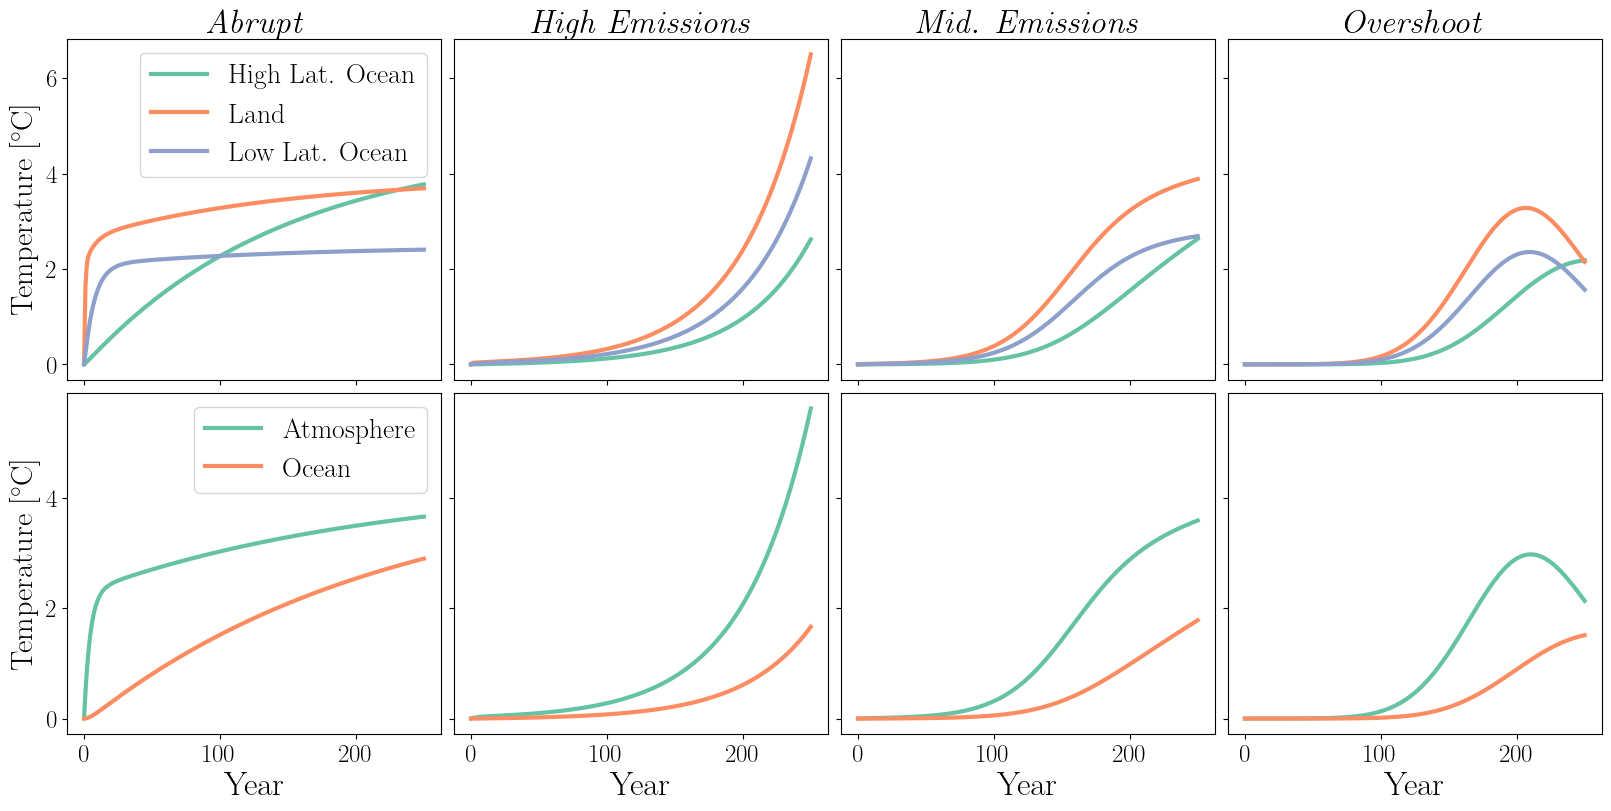

In [36]:
plot_box(experiments, scenarios, T_out, regions, save=False, fig_name='expBoxes_scens_v1')

In [127]:
def Lorenz_plot(scenarios, Z_mean, Z_std, t_vec, offset, T, save=False, fig_name=None):
  fig, ax = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True, sharey=True)

  for i, scen in enumerate(scenarios):
    ax[i].plot(t_vec, Z_mean[scen], c=brewer2_light(0), lw=2, label='Mean')
    ax[i].fill_between(t_vec, Z_mean[scen] - Z_std[scen], Z_mean[scen] + Z_std[scen], alpha=0.5, color=brewer2_light(0), label=r'$\sigma$')

    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax[i].set_xlabel('Time',fontsize=20)

    if scen == '2xCO2':
      title = r'\textit{Abrupt}'
    elif scen == 'High Emissions':
      title = r'\textit{High Emissions}'
    elif scen == 'Overshoot':
      title = r'\textit{Overshoot}'
    ax[i].set_title(title, fontsize=24, va="center")

  ax[0].legend(fontsize=20)
  ax[0].set_ylabel(r'$Z$',fontsize=24)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

In [7]:
# Required variables
alpha = 1./1000.
beta = 8.0/3.0
sigma = 10.

# Time variables
dt = 1.0 / 8
t_max = 250
t_vec = np.arange(0, t_max + dt, dt)

r = 10.0 * dt
N = 1000

T = 1
omega = 1./T
offset = 50

scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']

x_snap, y_snap, z_snap, z_mean, z_max, z_std, rho = {}, {}, {}, {}, {}, {}, {}
for i, scen in enumerate(scenarios):
  x_snap[scen], y_snap[scen], z_snap[scen], z_mean[scen], z_max[scen], z_std[scen], rho[scen] = emulator_utils.Lorenz_integrate(t_max, dt, N, r, alpha, beta, sigma, omega, offset, exp=i)

TypeError: Lorenz_integrate() missing 3 required positional arguments: 'x0', 'y0', and 'z0'

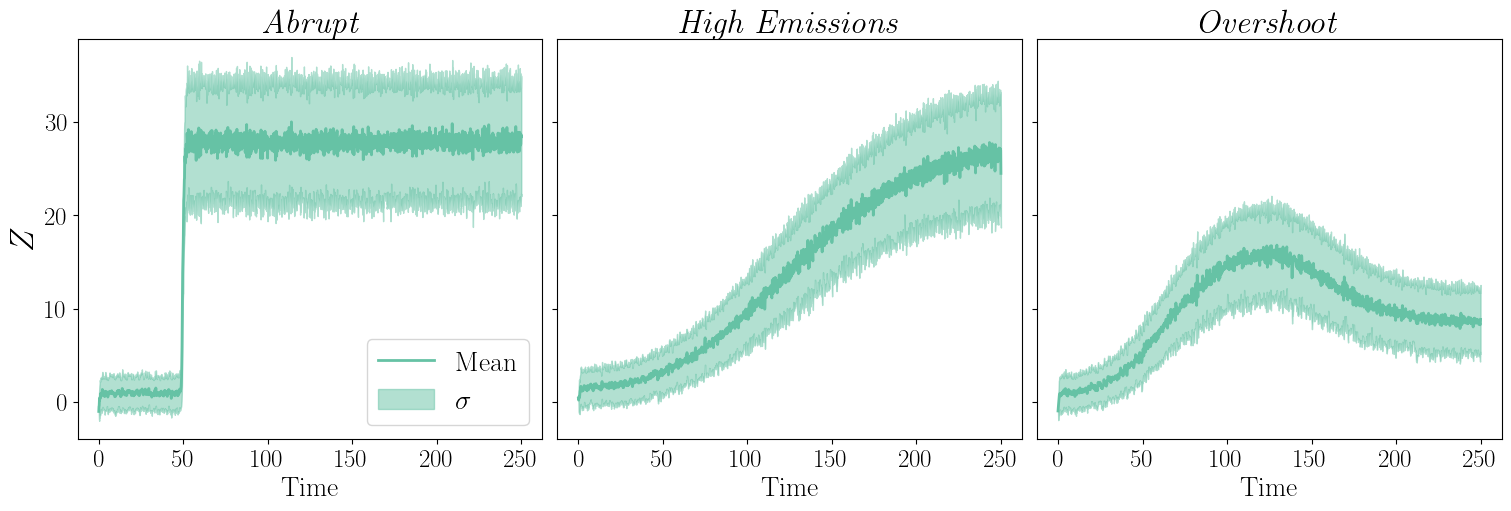

In [129]:
Lorenz_plot(scenarios, z_mean, z_std, t_vec, offset, T, save=True, fig_name='expLorenz_scens_v1')

In [22]:
dt = 1
exp = '3box_coup'
n_boxes = 3
operator_direct, T_pred_direct, error_metrics_direct = emulator_utils.emulate_scenarios('direct', scenarios=scenarios, outputs=T_out[exp], forcings=forcings[exp], n_boxes=n_boxes, dt=dt, diff_flag=1)

Train: Impulse Forcing - L2 Error


/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:330: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


In [31]:
def plot_response(G, regions, save=False, fig_name=None):
  fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True, sharex='col', sharey='row')
  n_boxes = len(regions)
  for k in range(n_boxes):
    ax.plot(G[k,0:50], lw=3, c=brewer2_light(k), label = regions[k])

  ax.legend(fontsize=20)
  ax.set_ylabel(r'Response [$^\circ$C/(Wm$^{-2}$)]',fontsize=22)
  ax.set_xlabel('Year',fontsize=24)
  ax.tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

In [72]:
import matplotlib.lines as mlines
def plot_box_true_pred(experiments, scenarios, T_out, T_pred, regions, save=False, fig_name=None):
  n_exp, n_scen, n_boxes = len(experiments), len(scenarios), len(regions)
  fig, ax = plt.subplots(n_exp, n_scen, figsize=(4*n_scen,5*n_exp), constrained_layout=True, sharex='col', sharey='row')

  truth_handle = mlines.Line2D([], [], color='k', linestyle='-',  label='Truth', lw=3, alpha=0.5)
  emu_handle   = mlines.Line2D([], [], color='k', linestyle='-.', label='Emulator', lw=3)

  nice_handle1 = mlines.Line2D([], [], color=brewer2_light(0), linestyle='-',  label='High Lat. Ocean', lw=3)
  nice_handle2 = mlines.Line2D([], [], color=brewer2_light(1), linestyle='-',  label='Land', lw=3)
  nice_handle3 = mlines.Line2D([], [], color=brewer2_light(2), linestyle='-',  label='Low Lat. Ocean', lw=3)

  for i, exp in enumerate(experiments):
    T_out_temp = T_out[exp]

    for j, scen in enumerate(scenarios):
      T_true_temp = T_out_temp[scen].T
      T_pred_temp = T_pred[scen].T
      n_boxes = T_true_temp.shape[1]
      for k in range(n_boxes):
        ax[j].plot(T_true_temp[:,k], lw=3, c=brewer2_light(k), label = regions[k], alpha=0.5)
        ax[j].plot(T_pred_temp[:,k], lw=3, c=brewer2_light(k), ls='-.')

      if j == 0:
        ax[j].legend([nice_handle1, nice_handle2, nice_handle3], ['High Lat. Ocean', 'Land', 'Low Lat. Ocean'], fontsize=20, loc='upper left')
        ax[j].set_ylabel(r'Temperature [$^\circ$C]',fontsize=22)

      if j == 1:
        ax[j].legend([truth_handle, emu_handle],['Truth', 'Emulator'], fontsize=20)

      if i == n_exp - 1:
        ax[j].set_xlabel('Year',fontsize=24)

          # Add scenario names as row labels (test)
      if i == 0:
        if scen == 'Abrupt':
          title = r'\textit{Abrupt}'
        elif scen == 'High Emissions':
          title = r'\textit{High Emissions}'
        elif scen == 'Mid. Emissions':
          title = r'\textit{Mid. Emissions}'
        elif scen == 'Overshoot':
          title = r'\textit{Overshoot}'
        ax[j].set_title(title, fontsize=18, va="center")

      ax[j].tick_params(axis='both', which='major', labelsize=18)

  fig.suptitle('Emulator Performance, Method 2: FDT', fontsize=24)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=900)

  return

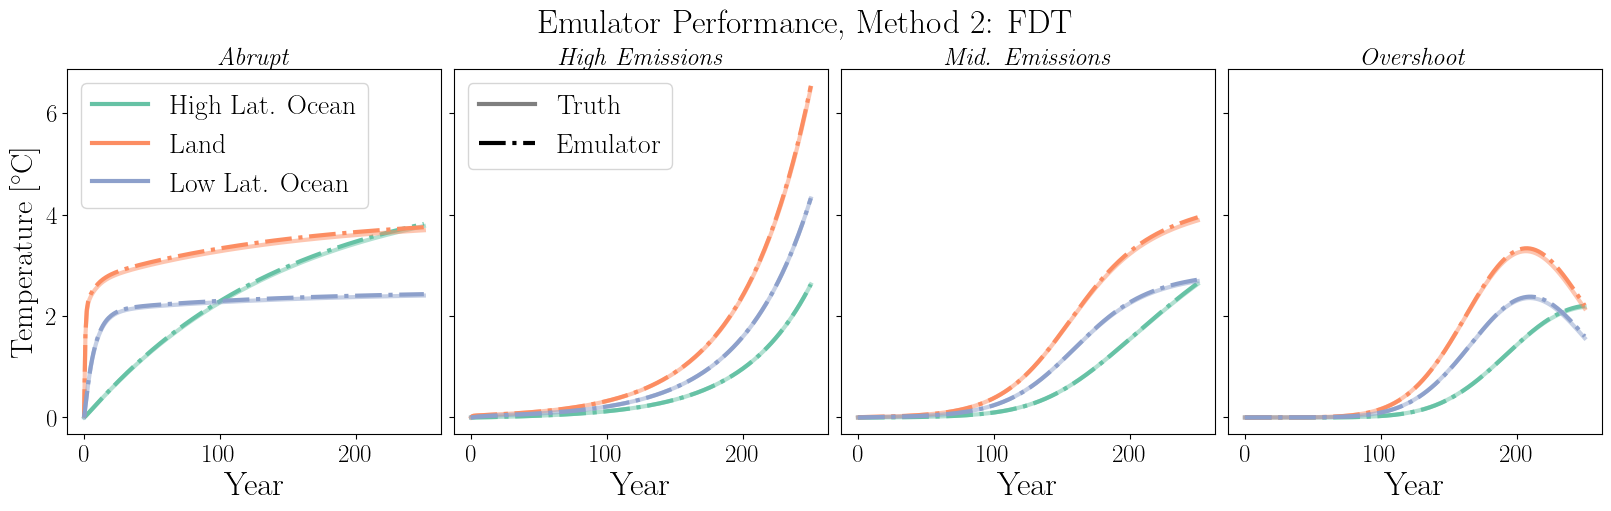

In [74]:
plot_box_true_pred(['3box_coup'], scenarios, T_out, T_pred_direct, regions, save=True, fig_name='FDT_error')

In [58]:
### Create error bar chart
scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']
ensemble_index = 39

error_by_method = {}
for method in ['1_PS','2_FDT','3_deconv','4_fit','5_DMD','6_EDMD']:
  error_by_method[method] = []
  for exp in ['1','2','3','4']:
    if method == '2_FDT' and exp == '2':
      error_by_method[method].append(0)
      continue
    # Load error data
    if exp == '2' or exp == '4':
      name = f'exp{exp}_{method}_error_ensemble'
    else:
      name = f'exp{exp}_{method}_error'
    error_dict = emulator_utils.open_error(name)

    # Make list of the errors (exclude train-test same)
    error_list_temp = []
    for train in scenarios:
      if method == '2_FDT':
        if exp == '2' or exp == '4':
          error_list_temp.append(np.mean(error_dict[train][ensemble_index]))
        else:
          error_list_temp.append(np.mean(error_dict[train]))
        continue
      for test in scenarios:
        if train == test:
          continue
        if exp == '2' or exp == '4':
          error_list_temp.append(np.mean(error_dict[train][test][ensemble_index]))
        else:
          error_list_temp.append(np.mean(error_dict[train][test]))

    error_by_method[method].append(np.median(error_list_temp))

error_by_method['6_EDMD'][1] = error_by_method['5_DMD'][1]

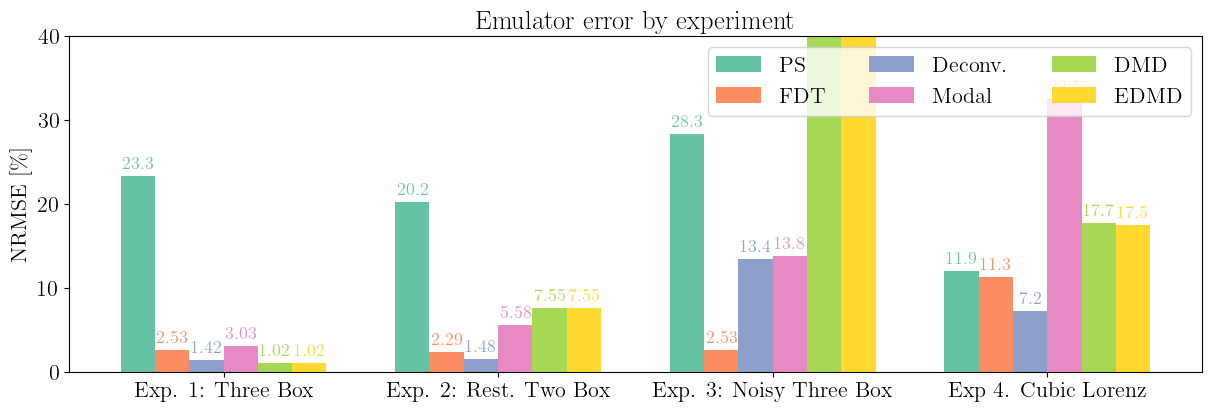

In [18]:
# --- Your Original Code (with modifications) ---
error_by_method_b['2_FDT'][2] = error_by_method_b['2_FDT'][0]
error_by_method_b['6_EDMD'][2] = error_by_method_b['5_DMD'][2]

# To make the code modular for a 4th experiment, you can simply add
# the new experiment to this tuple.
experiments = ('Exp. 1: Three Box', 'Exp. 2: Rest. Two Box', 'Exp. 3: Noisy Three Box', 'Exp 4. Cubic Lorenz')
methods = {
    'PS': (error_by_method_b['1_PS']),
    'FDT': (error_by_method_b['2_FDT']),
    'Deconv.': (error_by_method_b['3_deconv']),
    'Modal': (error_by_method_b['4_fit']),
    'DMD': (error_by_method_b['5_DMD']),
    'EDMD': (error_by_method_b['6_EDMD']),
}

cluster_spacing = 0.8
x = np.arange(len(experiments)) * cluster_spacing
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Create a color iterator from the colormap
colors = iter(brewer2_light.colors)

for attribute, measurement in methods.items():
    offset = width * multiplier
    color = next(colors)
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)

    # Add bar labels with 2 significant digits and matching color
    for rect in rects:
        height = rect.get_height()
        # Check for 'nan' data to label as 'N/a'
        if np.isnan(height):
            label_text = 'N/a'
            # Position 'N/a' at the baseline (y=0)
            y_pos = 0
        else:
            label_text = f'{height:.3g}'
            y_pos = height

        ax.annotate(label_text,
                    xy=(rect.get_x() + rect.get_width() / 2, y_pos),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=color,
                    fontsize=13)
    multiplier += 1

# --- Fixes and Improvements ---

# 1. Centered x-axis labels
# The position of the tick is the center of the group of bars
num_methods = len(methods)
tick_pos = x + width * (num_methods - 1) / 2
ax.set_xticks(tick_pos)
ax.set_xticklabels(experiments)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'NRMSE [\%]')
ax.set_title('Emulator error by experiment')
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 40)

plt.show()

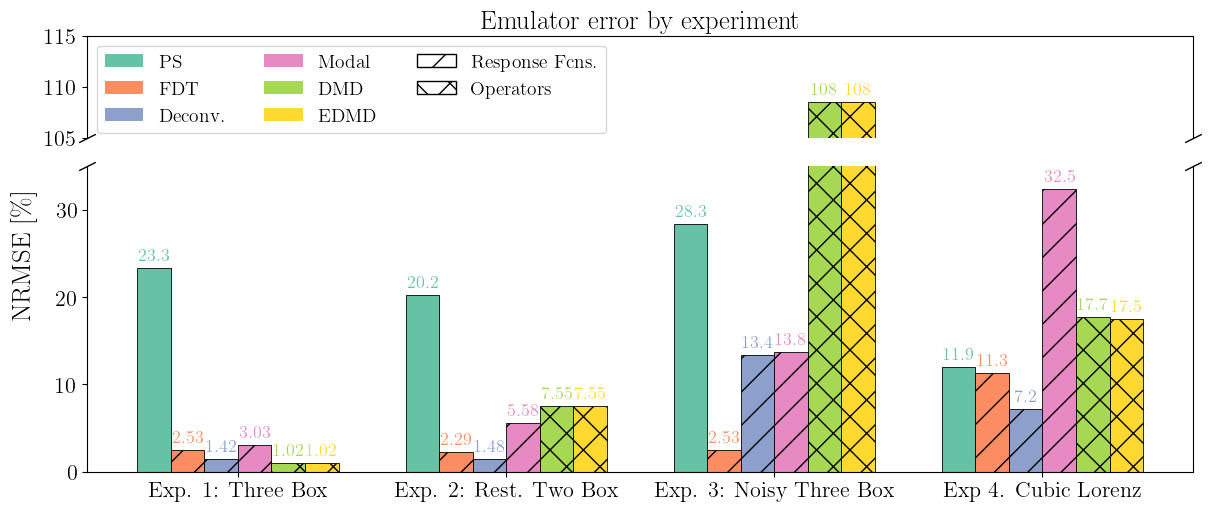

In [19]:
from matplotlib.patches import Patch

hatch_map = {
    'PS': '',      # Solid
    'FDT': '/',    # First hatch style
    'Deconv.': '/',
    'Modal': '/',
    'DMD': 'x',    # Second hatch style
    'EDMD': 'x'
}

# --- Plotting Setup ---
cluster_spacing = 0.8
x = np.arange(len(experiments)) * cluster_spacing
width = 0.1  # the width of the bars

# Create two subplots, sharing the x-axis
# Use gridspec_kw to make the top plot smaller than the bottom one
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, sharex=True, layout='constrained',
    gridspec_kw={'height_ratios': [1, 3]}
)
fig.set_size_inches(12, 5) # Adjust figure size for better readability

colors = iter(brewer2_light.colors)

# --- Plot Bars and Annotations on Both Subplots ---
# We create a function to avoid duplicating the plotting code
def plot_bars(ax):
    multiplier = 0
    # Create a color iterator from the colormap
    colors = iter(brewer2_light.colors)

    for attribute, measurement in methods.items():
        offset = width * multiplier
        color = next(colors)
        hatch_style = hatch_map.get(attribute, '') # Look up hatch style
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color,
                       hatch=hatch_style, edgecolor='black', linewidth=0.6)

        # Add bar labels with 2 significant digits and matching color
        for rect in rects:
            height = rect.get_height()
            # Check for 'nan' data to label as 'N/a'
            if np.isnan(height):
                label_text = 'N/a'
                # Position 'N/a' at the baseline (y=0)
                y_pos = 0
            else:
                label_text = f'{height:.3g}'
                y_pos = height

            ax.annotate(label_text,
                        xy=(rect.get_x() + rect.get_width() / 2, y_pos),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        color=color,
                        fontsize=13)
        multiplier += 1

# Plot the data on both the top and bottom axes
plot_bars(ax_top)
plot_bars(ax_bottom)

# --- Set Y-Axis Limits to Create the "Break" ---
# Top plot for the outliers
ax_top.set_ylim(105, 115)
# Bottom plot for the main data
ax_bottom.set_ylim(0, 35)

# --- Style the Subplots to Look Like One Chart ---
# Hide the spines between the two axes
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(axis='x', which='both', bottom=False) # remove x-ticks from top

# Add the diagonal "break" lines for visual clarity
d = .5  # size of diagonal lines in figure coordinates
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
ax_bottom.plot([0, 1], [1, 1], transform=ax_bottom.transAxes, **kwargs)

# --- Final Labels and Legend ---
# Set title and legend on the top plot
ax_top.set_title('Emulator error by experiment')
handles, labels = ax_top.get_legend_handles_labels()

# 2. Create proxy artists for the hatching legend
#    (You can fill in the labels as needed)
hatch_handles = [
    Patch(facecolor=brewer2_light(0), label='PS'),
    Patch(facecolor=brewer2_light(1), label='FDT'),
    Patch(facecolor=brewer2_light(2), label='Deconv.'),
    Patch(facecolor=brewer2_light(3), label='Modal'),
    Patch(facecolor=brewer2_light(4), label='DMD'),
    Patch(facecolor=brewer2_light(5), label='EDMD'),
    Patch(facecolor='white', edgecolor='black', hatch='/', label='Response Fcns.'),
    Patch(facecolor='white', edgecolor='black', hatch='x', label='Operators')
]

# 3. Combine the two sets of handles and create a single 3x3 legend
all_handles = handles + hatch_handles
ax_top.legend(handles=hatch_handles, loc='upper left', ncols=3, fontsize=14)

# Set shared Y-label and X-axis ticks/labels on the bottom plot
fig.supylabel(r'NRMSE [\%]') # Use fig.supylabel for a shared axis
num_methods = len(methods)
tick_pos = x + width * (num_methods - 1) / 2
ax_bottom.set_xticks(tick_pos)
ax_bottom.set_xticklabels(experiments)

#plt.savefig('Figures/master_error_v1.pdf',dpi=900)

In [15]:
error_by_method_b

{'1_PS': [np.float64(23.3173550831779),
  np.float64(20.235863550839454),
  np.float64(28.345924995756867),
  np.float64(11.948150499963258)],
 '2_FDT': [np.float64(2.531276881127217),
  np.float64(2.2874366051286117),
  np.float64(2.531276881127217),
  np.float64(11.25773240211217)],
 '3_deconv': [np.float64(1.4201599092517285),
  np.float64(1.4841517427279105),
  np.float64(13.420878760506653),
  np.float64(7.203806198070409)],
 '4_fit': [np.float64(3.031576966717825),
  np.float64(5.57892575884387),
  np.float64(13.771723085374312),
  np.float64(32.46237963412301)],
 '5_DMD': [np.float64(1.0157110493337695),
  np.float64(7.551138664554438),
  np.float64(108.47421114421033),
  np.float64(17.70962055767175)],
 '6_EDMD': [np.float64(1.0157110493415173),
  np.float64(7.551138664554438),
  np.float64(66.62891003743569),
  np.float64(17.47129866588466)]}

In [12]:
### Create error bar chart
scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']
ensemble_index = 49

error_by_method_b = {}
for method in ['1_PS','2_FDT','3_deconv','4_fit','5_DMD','6_EDMD']:
  error_by_method_b[method] = []
  for exp in ['1','3','2','4']:
    if method == '2_FDT' and exp == '2':
      error_by_method_b[method].append(0)
      continue
    # Load error data
    if exp == '2':
      name = f'exp{exp}_{method}_error_ensemble'
    elif exp == '4':
      name = f'exp{exp}b_{method}_error_ensemble'
    else:
      name = f'exp{exp}_{method}_error'
    error_dict_b = emulator_utils.open_error(name)

    # Make list of the errors (exclude train-test same)
    error_list_temp = []
    for train in scenarios:
      if method == '2_FDT':
        if exp == '2' or exp == '4':
          error_list_temp.append(np.mean(error_dict_b[train][ensemble_index]))
        else:
          error_list_temp.append(np.mean(error_dict_b[train]))
        continue
      for test in scenarios:
        if train == test:
          continue
        if exp == '2' or exp == '4':
          error_list_temp.append(np.mean(error_dict_b[train][test][ensemble_index]))
        else:
          error_list_temp.append(np.mean(error_dict_b[train][test]))

    error_by_method_b[method].append(np.median(error_list_temp))

error_by_method_b['6_EDMD'][1] = error_by_method_b['5_DMD'][1]

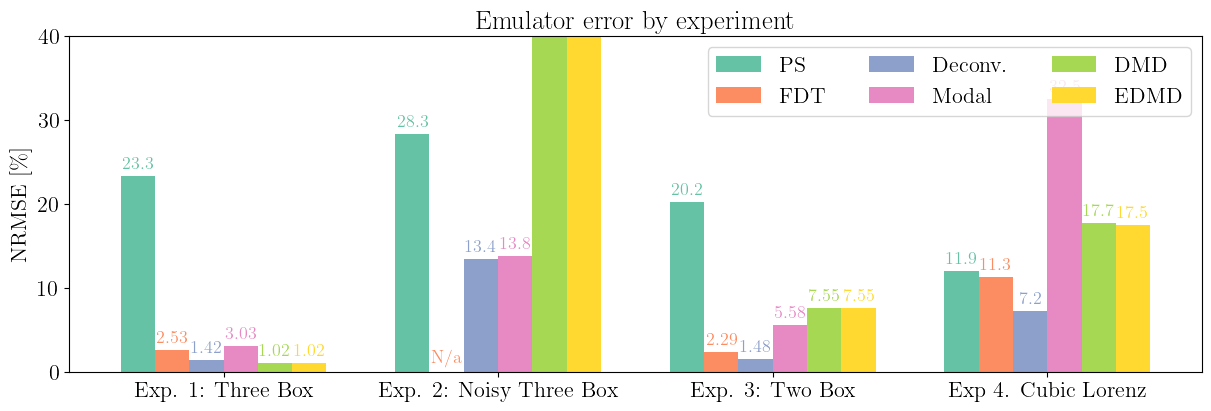

In [118]:
# --- Your Original Code (with modifications) ---
error_by_method_b['2_FDT'][1] = np.nan

# To make the code modular for a 4th experiment, you can simply add
# the new experiment to this tuple.
experiments = ('Exp. 1: Three Box', 'Exp. 2: Noisy Three Box', 'Exp. 3: Two Box', 'Exp 4. Cubic Lorenz')
methods = {
    'PS': (error_by_method_b['1_PS']),
    'FDT': (error_by_method_b['2_FDT']),
    'Deconv.': (error_by_method_b['3_deconv']),
    'Modal': (error_by_method_b['4_fit']),
    'DMD': (error_by_method_b['5_DMD']),
    'EDMD': (error_by_method_b['6_EDMD']),
}

cluster_spacing = 0.8
x = np.arange(len(experiments)) * cluster_spacing
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Create a color iterator from the colormap
colors = iter(brewer2_light.colors)

for attribute, measurement in methods.items():
    offset = width * multiplier
    color = next(colors)
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)

    # Add bar labels with 2 significant digits and matching color
    for rect in rects:
        height = rect.get_height()
        # Check for 'nan' data to label as 'N/a'
        if np.isnan(height):
            label_text = 'N/a'
            # Position 'N/a' at the baseline (y=0)
            y_pos = 0
        else:
            label_text = f'{height:.3g}'
            y_pos = height

        ax.annotate(label_text,
                    xy=(rect.get_x() + rect.get_width() / 2, y_pos),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=color,
                    fontsize=13)
    multiplier += 1

# --- Fixes and Improvements ---

# 1. Centered x-axis labels
# The position of the tick is the center of the group of bars
num_methods = len(methods)
tick_pos = x + width * (num_methods - 1) / 2
ax.set_xticks(tick_pos)
ax.set_xticklabels(experiments)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'NRMSE [\%]')
ax.set_title('Emulator error by experiment')
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 40)

plt.show()

In [119]:
error_by_method_b

{'1_PS': [np.float64(23.3173550831779),
  np.float64(28.345924995756867),
  np.float64(20.235863550839454),
  np.float64(11.948150499963258)],
 '2_FDT': [np.float64(2.531276881127217),
  nan,
  np.float64(2.2874366051286117),
  np.float64(11.25773240211217)],
 '3_deconv': [np.float64(1.4201599092517285),
  np.float64(13.420878760506653),
  np.float64(1.4841517427279105),
  np.float64(7.203806198070409)],
 '4_fit': [np.float64(3.031576966717825),
  np.float64(13.771723085374312),
  np.float64(5.57892575884387),
  np.float64(32.46237963412301)],
 '5_DMD': [np.float64(1.0157110493337695),
  np.float64(108.47421114421033),
  np.float64(7.551138664554438),
  np.float64(17.70962055767175)],
 '6_EDMD': [np.float64(1.0157110493415173),
  np.float64(108.47421114421033),
  np.float64(7.5511386645543634),
  np.float64(17.47129866588466)]}

In [ ]:
error_metrics_all = {
  'PS':error_metrics_PS,
  'Deconv':error_metrics_deconvolve,
  'Fit':error_metrics_fit,
  'DMD':error_metrics_DMD
}

In [80]:
R_mean = emulator_utils.open_error('R_mean')

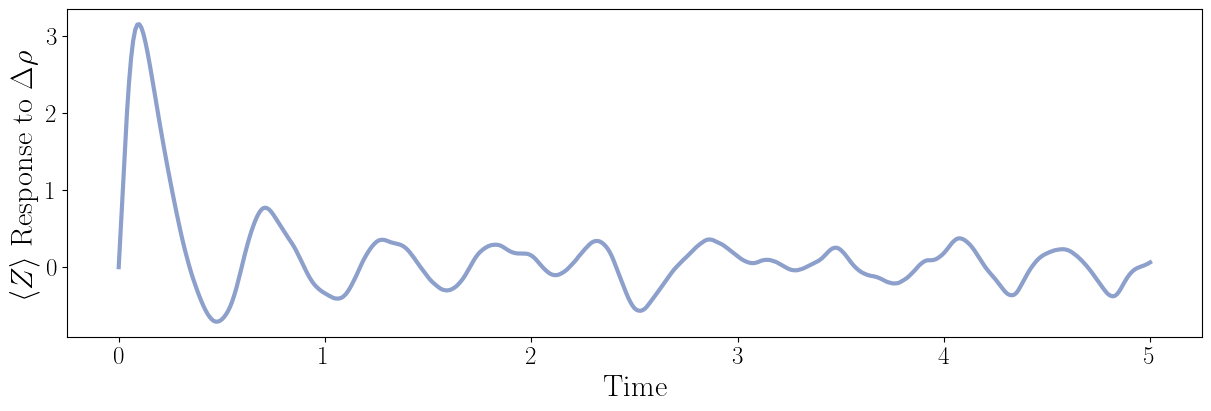

In [98]:
fig, ax = plt.subplots(figsize=(12,4),layout='constrained')
dt = 0.01
t = np.arange(0,5+dt,dt)
ax.plot(t,R_mean, lw=3, c=brewer2_light(2))
ax.set_ylabel(r'$\langle Z \rangle$ Response to $\Delta \rho$',fontsize=22)
ax.set_xlabel('Time',fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('Figures/Z_response.pdf',dpi=900)